In [19]:
import keras
from keras import backend as K
from keras.applications.inception_v3 import InceptionV3
K.set_image_data_format("channels_last")

In [20]:
from keras.utils.data_utils import get_file

CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'
def decode_predictions(preds, top=5):
    global CLASS_INDEX
    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects '
                         'a batch of predictions '
                         '(i.e. a 2D array of shape (samples, 1000)). '
                         'Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        fpath = get_file('imagenet_class_index.json',
                         CLASS_INDEX_PATH,
                         cache_subdir='models')
        CLASS_INDEX = json.load(open(fpath))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        results.append(result)
    return results

def preprocess_input(x):
    x /= 255.
    x -= 0.5
    x *= 2.
    return x


In [21]:
model = InceptionV3(weights='imagenet')

print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, 299, 299, 3)   0                                            
____________________________________________________________________________________________________
conv2d_189 (Conv2D)              (None, 149, 149, 32)  864                                          
____________________________________________________________________________________________________
batch_normalization_189 (BatchNo (None, 149, 149, 32)  96                                           
____________________________________________________________________________________________________
activation_189 (Activation)      (None, 149, 149, 32)  0                                            
___________________________________________________________________________________________

(479, 500, 3)


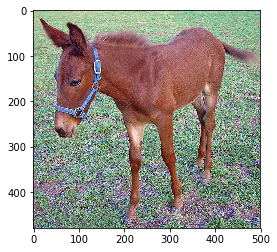

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from keras.preprocessing import image
#from imagenet_utils import preprocess_input, decode_predictions

img_path = '../data/horse.jpg'
img_path = '../data/mula.jpg'
#img_path = '../data/Moremi_elephant.jpg'
f = mpimg.imread(img_path)
print(f.shape)
plt.imshow(f)

<class 'PIL.Image.Image'>
(299, 299, 3)


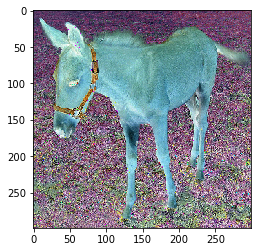

In [43]:
img = image.load_img(img_path, target_size=(299, 299))
print(type(img))
x = image.img_to_array(img)
print(x.shape)
plt.imshow(x)

In [44]:
x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 299, 299, 3)


In [45]:
x = preprocess_input(x)

In [46]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds))
# print: [[u'n02504458', u'African_elephant']]

Predicted: [[('n02389026', 'sorrel', 0.9664107), ('n03538406', 'horse_cart', 0.00091760856), ('n03124170', 'cowboy_hat', 0.00070160441), ('n04604644', 'worm_fence', 0.00060407148), ('n04049303', 'rain_barrel', 0.00054032932)]]
